# Итоговая работа по курсу «Python и математика для анализа данных»

## Получение данных

Загрузка библиотек

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from collections import Counter
%matplotlib inline

Загрузка датасета

In [2]:
data=pd.read_csv('HR.csv')
data_backup=data

Просмотр структуры и содержимого

In [3]:
display(data.head(10))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Просмотр размера

In [4]:
data.shape

(14999, 10)

Оценка качества

In [5]:
data.isnull().sum().sort_values(ascending=False)

salary                   0
sales                    0
promotion_last_5years    0
left                     0
Work_accident            0
time_spend_company       0
average_montly_hours     0
number_project           0
last_evaluation          0
satisfaction_level       0
dtype: int64

В данных нет пропущенных значений, качество отличное

In [6]:
print(f"Количество структурных подразделений - {len(data.sales.unique())}")
print(f"Количество категорий зарплат - {len(data.salary.unique())}")

Количество структурных подразделений - 10
Количество категорий зарплат - 3


Произведем перевод категориальных переменных в вектора

In [7]:
data = pd.get_dummies(data, columns = ["sales","salary"],
                             prefix=["sales","salary"])

# Основные статистистические характеристики переменных

In [8]:
describe = data.describe().T

def get_mode(col):
    try:
        s = statistics.mode(data[col])
    except:
        s = Counter(list(data[col])).most_common(1)
    return s

describe['iname'] = describe.index
describe['Mode'] = describe['iname'].apply(get_mode)
describe = describe.drop(columns = ['iname'], axis=1)
display(describe)

,count,mean,std,min,25%,50%,75%,max,Mode
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0,0.1
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0,0.55
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0,4
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0,"[(135, 153)]"
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0,3
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0,0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0,0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0,0
sales_IT,14999.0,0.081805,0.274077,0.00,0.00,0.00,0.00,1.0,0
sales_RandD,14999.0,0.052470,0.222981,0.00,0.00,0.00,0.00,1.0,0


Интересным является значение моды переменной satisfaction_level, при средней удовлетворенности 0.6 - наиболее частая оценка - 0.1. Это может быть следствием того, что 0.1 - это минимальная оценка, а оценки выше имеют более высокую дробность.

# Визуализация корреляционной матрицы

In [9]:
corr = data.corr()
display(corr)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006373,0.006615,...,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.001269,-0.005471,...,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,-0.020628,0.005221,0.006191
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.003287,0.009703,...,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.008726,-0.002504,0.007377
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006967,-0.001177,...,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.007101,-0.001050,0.005007
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.006053,-0.021116,...,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.009293,0.017167,...,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,0.009040,-0.006813,0.001856
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,...,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.120929,0.134722,-0.068833
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.038942,0.021268,...,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,0.076756,-0.082832,0.040985
sales_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,...,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.016089,0.005116,0.003775
sales_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,-0.070240,1.000000,...,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.015115,-0.011887,0.020402


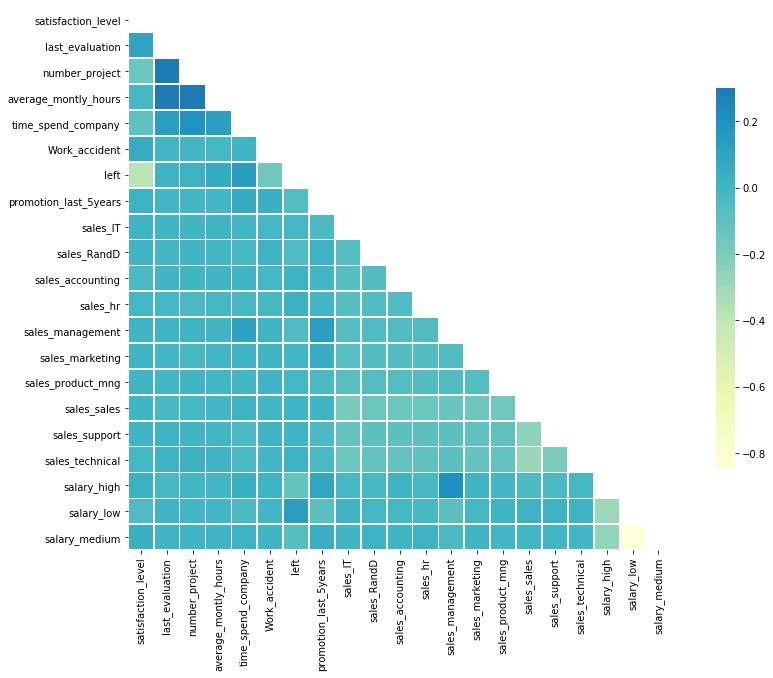

In [10]:
plt.figure(figsize=(16,10))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .7})
plt.show()

Наиболее сильную корреляционную связь имеют переменные number_project и average_montly_hours, что вполне объяснимо: больше проектов - больше времени на работе. Также связь есть (отрицательная корреляция) у left и satisfaction_level, что тоже логично.
Также видна связь last_evaluation с number_project и average_montly_hours.

Преобразование категориальных переменных в вектора позволило сделать вывод из матрицы корреляции о том, что в "департаменте" management - более высокие зарплаты, а низкие зарплаты влияют на пиизнак left

# Визуализация взаимосвязей между переменными

#  
Посмотрим взаимосвязь number_project и average_montly_hours. Поскольку number_project - дискретна, то не информативно строить scatterplot, построим график плотности распределения количества рабочих часов для каждого количества проектов

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


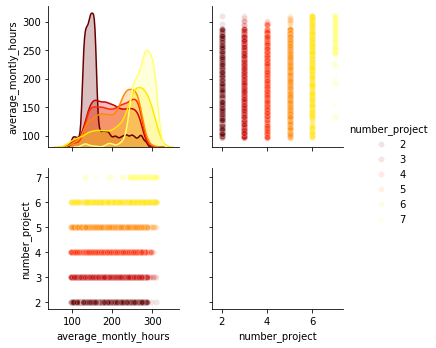

In [11]:
data1=data[['average_montly_hours','number_project']]
sns.pairplot(data=data1,hue='number_project',plot_kws={'alpha':0.1},palette='hot')
plt.show()

На графике 1-1 видно, что чем больше проектов, тем правее смещен "горб" графика распределения.

#  
Посмотрим взаимосвязь satisfaction_level и time_spend_company.Интерес представляет также отличия этих параметров в зависимости от значения left.

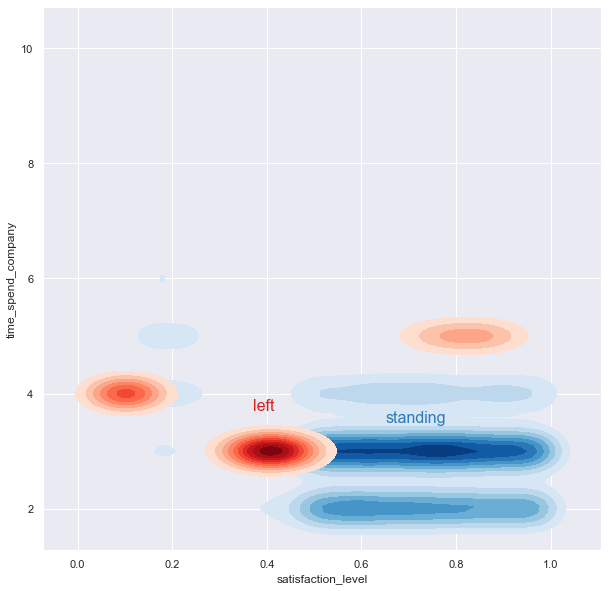

In [12]:
sns.set(style="darkgrid")

left = data_backup.query("left == 1")
standing = data_backup.query("left == 0")

f, ax = plt.subplots(figsize=(10, 10))

ax = sns.kdeplot(standing.satisfaction_level, standing.time_spend_company,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(left.satisfaction_level, left.time_spend_company,
                 cmap="Reds", shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(0.65, 3.5, "standing", size=16, color=blue)
ax.text(0.37, 3.7, "left", size=16, color=red)
plt.show()

Выводы:
1. Наиболее распостраненный срок работы в компании - 3 года
2. Уровень удовлетворенности влияет на уход
3. Сотрудники с двухлетним стажем либо улучшают свою оценку т.е. их уровень удовлетворенности растет, либо уходят.

# С использованием t-test статистики проверить взаимосвязи между несколькими переменными

#  
Проверим, имеется ли различие в выборках сотрудников с низкой зарплатой и всех прочих с точки зрения склонности покинуть компанию. Выборки не имеют нормального распределения, применим критерий Манна-Уитни

In [13]:
left_with_low_salary = data[data['salary_low']==1]['left']
left_with_middlehigh_salary = data[data['salary_low']==0]['left']

u, p_value = stats.mannwhitneyu(left_with_low_salary, left_with_middlehigh_salary)
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 1.8681201936764805e-61


pvalue стремится к нулю, то есть различие между выборками есть, сотрудники с низкой зарплатой чаще покидают компанию.

#  
Проверим, влияет ли количество часов, проведенных на работе на появление несчастных случаев

In [14]:
work_accidents_Y = data[data['Work_accident']==1]['average_montly_hours']
work_accidents_N = data[data['Work_accident']==0]['average_montly_hours']

stats.ttest_ind(work_accidents_Y, work_accidents_N)

Ttest_indResult(statistic=-1.2421846964457004, pvalue=0.21418784880707778)

pvalue = 0.21, т.е. гипотезу о различии выборок отклоняем. 

#  
Проверим, есть ли различи между департаментами в части результатов последней оценки

In [15]:
sales_IT_ev=data[data['sales_IT']==1]['last_evaluation']
sales_RandD_ev=data[data['sales_RandD']==1]['last_evaluation']
sales_accounting_ev=data[data['sales_accounting']==1]['last_evaluation']
sales_hr_ev=data[data['sales_hr']==1]['last_evaluation']
sales_management_ev=data[data['sales_management']==1]['last_evaluation']
sales_marketing_ev=data[data['sales_marketing']==1]['last_evaluation']
sales_product_mng_ev=data[data['sales_product_mng']==1]['last_evaluation']
sales_sales_ev=data[data['sales_sales']==1]['last_evaluation']
sales_support_ev=data[data['sales_support']==1]['last_evaluation']
sales_technical_ev=data[data['sales_technical']==1]['last_evaluation']

stats.f_oneway(sales_IT_ev,sales_RandD_ev,sales_accounting_ev,sales_hr_ev,sales_management_ev,sales_marketing_ev,
               sales_product_mng_ev,sales_sales_ev,sales_support_ev,sales_technical_ev)
              
               


F_onewayResult(statistic=1.6734194195121965, pvalue=0.08938949853011371)

Отклоняем гипотезу о различии в переменных.

# Сколько работников работает в каждом департаменте

In [16]:
department_hr = data_backup[data_backup['left']==0].groupby(['sales']).count()['left']
department_hr.sort_values(ascending = False)

sales
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: left, dtype: int64

# Распределение сотрудников по зарплатам

Распределение зарплат действующих сотрудников


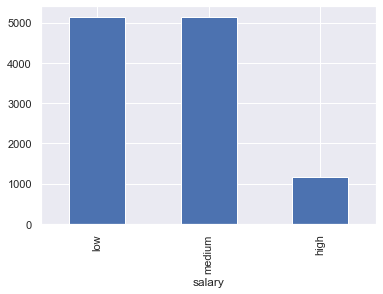

Распределение зарплат ушедших сотрудников


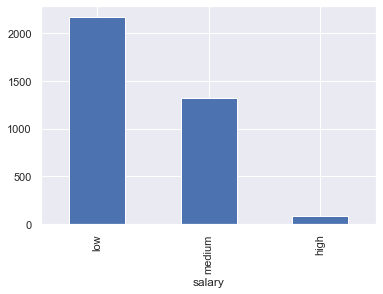

In [17]:
print('Распределение зарплат действующих сотрудников')
data_backup[data_backup['left']==0].groupby(['salary']).count()['left'].sort_values(ascending = False).plot.bar()
plt.show()

print('Распределение зарплат ушедших сотрудников')
data_backup[data_backup['left']==1].groupby(['salary']).count()['left'].sort_values(ascending = False).plot.bar()
plt.show()

# Показать распределение сотрудников по зарплатам совместно с департаментами

In [18]:
data_backup['wage'] = data_backup['salary']
data_backup.loc[data_backup['salary'] == 'low', 'wage'] = 0
data_backup.loc[data_backup['salary'] == 'medium', 'wage'] = 1
data_backup.loc[data_backup['salary'] == 'high', 'wage'] = 2

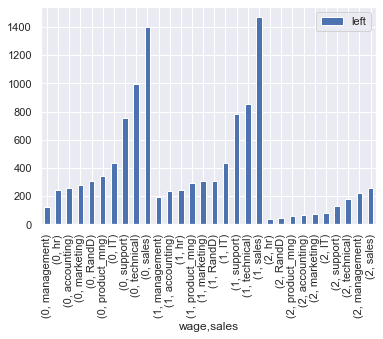

In [19]:
data2 = data_backup[data_backup['left']==0][['wage','sales','left']]
data2.groupby(['wage','sales']).count().sort_values(['wage','left']).plot.bar()
plt.show()

В категориях низкой и средней ЗП распределение сотрудников по департаментам почти идентичное. В группе высоких ЗП management - второе по частоте значение.

# Сколько сотрудников покинули компанию

In [20]:
print(f"{data['left'].sum()} сотрудник(ов) покинул(и) компанию")

3571 сотрудник(ов) покинул(и) компанию


# Почему сотрудники покидают компанию

#   
Исследуем наиболее важные атрибуты по значимости влияния на уход. Используем модель рандомных деревьев, т.к. классы (ушедших\не ушедших) не являются сбалансированными)

In [21]:
input_x = data.drop(columns='left')
output_y = data['left']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3)

No handles with labels found to put in legend.


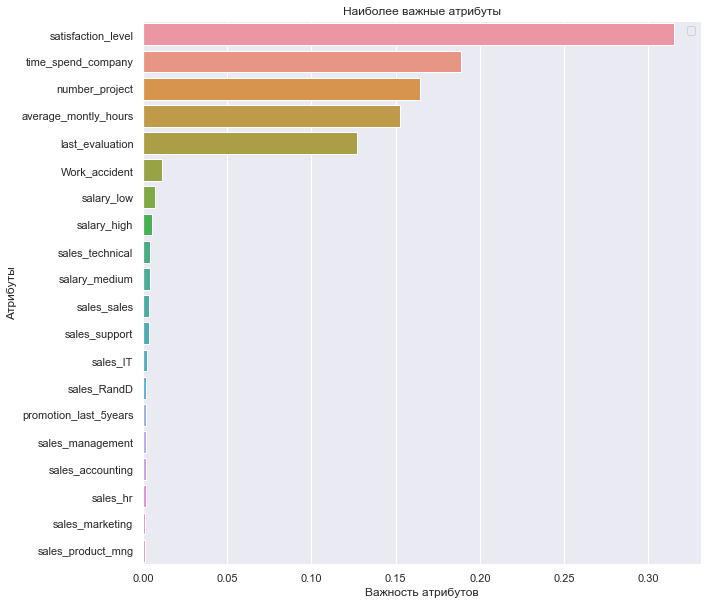

In [23]:
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)

# создаем модель дерева решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [24]:
print(f"Точность модели: {model.score(X_test, y_test)}")

Точность модели: 0.9931111111111111


Какие можно сделать выводы: 
1. Очевидно, уровень удовлетворенности - наиболее важный фактор ухода. Но нам пока неизвестны факторы, влияющие на сам уровень удовлетворенности
2. Продвижение по карьере (за последние 5 лет) никак не влияет на склонность покинуть компанию
3. Принадлежность к департаментам technical, support, sales увеличивает склонность к уходу. Объясняется тем, что это наименее выскооплачиваемые должности (потенциально - начало карьеры, можно было бы проверить при наличии соответсвуещих данных)

#   
Модель логистической регрессии

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
ros = RandomOverSampler(random_state=0)
X = input_x
Y = output_y
ros.fit(X, Y)
X_resampled, y_resampled = ros.fit_sample(X, Y)

print(f"До: всего {len(Y)}, ушло {sum(Y)}")
print(f"После: всего {len(y_resampled)}, ушло {sum(y_resampled)}")

До: всего 14999, ушло 3571
После: всего 22856, ушло 11428


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

Точность предсказания модели:  0.7764328423508823


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Проверим, как повлияли на точность логистической регресси добавленные ранее вектора one-hot-encoding

In [28]:
input_x_cutsales = input_x.drop(columns=['sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical'])

In [29]:
ros = RandomOverSampler(random_state=0)
X = input_x_cutsales
Y = output_y
ros.fit(X, Y)
X_resampled, y_resampled = ros.fit_sample(X, Y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

Точность предсказания модели:  0.7749744786349716


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
input_x_cutsalary = input_x_cutsales.drop(columns=['salary_high',
       'salary_low', 'salary_medium'])

In [31]:
ros = RandomOverSampler(random_state=0)
X = input_x_cutsalary
Y = output_y
ros.fit(X, Y)
X_resampled, y_resampled = ros.fit_sample(X, Y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность предсказания модели:  0.7595158232463176


Видим, что в без данных о зарплате и департаменте точность модели - 75,9%, Добавление данных зарплате повышает точность до 77,5%, а добавление данных о департаменте почти не влияет на точность - 77,6% 

#   
В качестве эксперимента изменим целевую переменную и построим линейную регрессию от нескольких переменных для предсказания удовлетворенности (полезно использовать для оценки удовлетворенности без проведения опроса сотрудников)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
column_sels = ['last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium']
x = data.loc[:,column_sels]

last_evaluation = x['last_evaluation']
average_montly_hours = x['average_montly_hours']
promotion_last_5years = x['promotion_last_5years']
# sales_hr = x['sales_hr']
# sales_sales = x['sales_sales']
# salary_low = x['salary_low']
number_project = x['number_project']
time_spend_company = x['time_spend_company']
# sales_IT = x['sales_IT']
# sales_management = x['sales_management']
# sales_support = x['sales_support']
# salary_medium = x['salary_medium']
Work_accident = x['Work_accident']
# sales_RandD = x['sales_RandD']
# sales_marketing = x['sales_marketing']
# sales_technical = x['sales_technical']
# sales_accounting = x['sales_accounting']
# sales_product_mng = x['sales_product_mng']
# salary_high = x['salary_high']

In [34]:
y = data['satisfaction_level']
# x = np.vstack([np.array(last_evaluation),np.array(average_montly_hours),np.array(promotion_last_5years),np.array(sales_hr),
#                np.array(sales_sales),np.array(salary_low),np.array(number_project),np.array(time_spend_company),
#                np.array(sales_IT),np.array(sales_management),np.array(sales_support),np.array(salary_medium),
#                np.array(Work_accident),np.array(sales_RandD),np.array(sales_marketing),np.array(sales_technical),
#                np.array(sales_accounting),np.array(sales_product_mng),np.array(salary_high)]).T

x = np.vstack([np.array(last_evaluation),np.array(average_montly_hours),np.array(promotion_last_5years),
               np.array(number_project),np.array(time_spend_company),np.array(Work_accident)]).T

X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

model = LinearRegression().fit(X_train, y_train)

In [35]:
model.score(X_test, y_test)

0.057756534938083526

Точность модели очень низкая, 5-6%, т.е. модель нельзя применять.